jupyter nbconvert 7_1_gcta_bivar.ipynb --to script


python 7_1_gcta_bivar.py $WINDOW

for i in {00..101};do python 6_gcta_uni.py $i;done

for i in {00..10};do python 4_association.py $i;done


https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6292650/

In [1]:
import os
import sys

import logging
import re
import pathlib

import datetime

import numpy as np
import pandas as pd
from scipy.stats import pearsonr

import matplotlib.pyplot as plt

import seaborn as sns

from pyplink import PyPlink

from basic_tools import *

In [2]:
log = logging.getLogger('logger')
log.setLevel(logging.DEBUG)

log_file_name=datetime.datetime.now().strftime('%Y%m%d_%H%M%S')+'.log'
log_file_path=data_out_gcta_path+log_file_name
fileHandler = logging.FileHandler(log_file_path)
streamHandler = logging.StreamHandler()

formatter = logging.Formatter(' %(asctime)s [%(levelname)s] %(lineno)d > %(message)s')
fileHandler.setFormatter(formatter)
streamHandler.setFormatter(formatter)

log.addHandler(fileHandler)
log.addHandler(streamHandler)

In [3]:
plink_KCHIP_HLA_AA_SNP_1000G=PyPlink(plink_KCHIP_HLA_AA_SNP_1000G_path)
plink_KCHIP_HLA_AA_SNP_1000G_fam=plink_KCHIP_HLA_AA_SNP_1000G.get_fam().astype({'fid':str,'iid':str}).rename(columns={'fid':'FID','iid':'IID'})
plink_KCHIP_HLA_AA_SNP_1000G_bim=plink_KCHIP_HLA_AA_SNP_1000G.get_bim()

In [4]:
phenotypes=pd.read_csv(pheno_all_file_path,sep='\t')
'  '.join(phenotypes.columns)

'ID  age  sex  asthma  chronic_bronchitis  allergic_disease  stomach_cancer  liver_cancer  colorectal_cancer  breast_cancer  cervical_cancer  lung_cancer  thyroid_cancer  prostate_cancer  bladder_cancer  colon_polyps  angina_pectoris_myocardial_infarction  hypertension  stroke  transient_ischemic_attacks  acute_liver_disease  diabetes  hyperlipidemia  thyroid_disease  arthritis  rheumatoid_arthritis  osteoporosis  parkinson  pwi_total  chronic_gastritis_stomach_ulcer  duodenal_ulcer  urinary_tract_infection  height  hip_circumference  waist_circumference  weight  systolic_blood_pressure  diastolic_blood_pressure  pulse  hysterectomy  menarche_onset_age  menopause_age  menopause_cycle  ovarian_extraction  child_delivery_number  big_baby  small_baby  child_present  child_dead  hematocrit  hemoglobin  platelet  rbc  wbc  mcv  mch  mchc  total_bilirubin  bun  creatinine  blood_in_urine  glucose_in_urine  alt  ast  gtp  total_cholesterol  hdl_cholesterol  hba1c  freet4  tsh  triglyceride  a

In [5]:
phenotypes=phenotypes.set_index('ID').loc[plink_KCHIP_HLA_AA_SNP_1000G_fam['IID']]
phenotypes.shape

(125673, 101)

In [6]:
assert (phenotypes.index!=plink_KCHIP_HLA_AA_SNP_1000G_fam['IID']).sum()==0

In [10]:
#binary_continuous_traits=phenotypes.columns.difference(['age','sex','cohort'])
#binary_continuous_traits,len(binary_continuous_traits)

In [11]:
result_uni=pd.read_csv(data_out_gcta_path+'result_uni.tsv',sep='\t',index_col=0)

In [12]:
result_uni

,Intercept-Estimate,Intercept-P_Jackknife,Intercept-P_OLS,Intercept-SE_Jackknife,Intercept-SE_OLS,V(G)/Vp-Estimate,V(G)/Vp-P_Jackknife,V(G)/Vp-P_OLS,V(G)/Vp-SE_Jackknife,V(G)/Vp-SE_OLS,phenotype_type,prevalence,h2_liab
FEV_over_FVC_predicted,-0.000135,2.873650e-271,0.478573,3.826920e-06,0.000190,0.002303,3.384480e-01,6.651310e-02,0.002406,0.001255,continuous,NaN,0.002303
FEV_predicted,-0.000134,0.000000e+00,0.479444,3.227420e-06,0.000190,-0.000013,9.932370e-01,9.914880e-01,0.001579,0.001255,continuous,NaN,-0.000013
FVC_predicted,-0.000134,0.000000e+00,0.479416,3.062940e-06,0.000190,0.000071,9.654350e-01,9.549290e-01,0.001637,0.001255,continuous,NaN,0.000071
MVV_predicted,-0.000134,0.000000e+00,0.479733,2.918980e-06,0.000190,-0.000780,5.989260e-01,5.340930e-01,0.001484,0.001255,continuous,NaN,-0.000780
acute_liver_disease,-0.000013,3.071080e-39,0.479145,1.001740e-06,0.000019,0.000158,4.337890e-01,2.003670e-01,0.000202,0.000124,binary,0.005666,0.003419
albumin,-0.000008,0.000000e+00,0.480050,6.426690e-08,0.000011,0.001063,3.436960e-06,2.281940e-45,0.000229,0.000075,continuous,NaN,0.001063
allergic_disease,-0.000011,0.000000e+00,0.479473,1.939530e-07,0.000016,0.000719,4.942900e-03,8.354110e-12,0.000256,0.000105,binary,0.073787,0.002513
alt,-0.000008,0.000000e+00,0.479865,1.259110e-07,0.000012,0.000752,1.427530e-04,4.558330e-22,0.000198,0.000078,continuous,NaN,0.000752
angina_pectoris_myocardial_infarction,-0.000012,4.147200e-190,0.479422,4.126780e-07,0.000017,0.000271,2.214820e-01,1.769960e-02,0.000222,0.000114,binary,0.024484,0.001964
arthritis,-0.000012,0.000000e+00,0.479483,1.718150e-07,0.000016,0.000152,3.936660e-01,1.619360e-01,0.000179,0.000109,binary,0.090298,0.000473


In [13]:
grm_path='data/genotype/4_merge/KCHIP_HLA_AA_SNP_1000G.grm'

In [14]:
#np.all(pd.read_csv(data_out_gcta_path+phenotype_name1+'-'+phenotype_name2+'.phe',sep='\t',header=None)[2].isnull()|pd.read_csv(data_out_gcta_path+phenotype_name1+'-'+phenotype_name2+'.phe',sep='\t',header=None)[3].isnull())

In [20]:
rG_matrix_upper=np.zeros((len(result_uni),len(result_uni)))
rG_SE_matrix_upper=np.zeros((len(result_uni),len(result_uni)))

In [23]:
for i in range(0,len(result_uni)):
    for j in range(i+1,len(result_uni)):
        phenotype_name1=result_uni.iloc[i].name
        phenotype_name2=result_uni.iloc[j].name


        if os.path.exists(data_out_gcta_path+phenotype_name1+'-'+phenotype_name2+'.HEreg'):
            pass
        elif os.path.exists(data_out_gcta_path+phenotype_name2+'-'+phenotype_name1+'.HEreg'):
            (phenotype_name2,phenotype_name1)=phenotype_name1,phenotype_name2
        elif os.path.exists(data_out_gcta_path+phenotype_name2+'-'+phenotype_name1+'.log'):
            #print(phenotype_name1,phenotype_name2,'missing')
            with open(data_out_gcta_path+phenotype_name2+'-'+phenotype_name1+'.log') as f:
                if 'no phenotype data is found' in f.read():
                    continue
        elif os.path.exists(data_out_gcta_path+phenotype_name1+'-'+phenotype_name2+'.log'):
            #print(phenotype_name1,phenotype_name2,'missing')
            with open(data_out_gcta_path+phenotype_name1+'-'+phenotype_name2+'.log') as f:            
                if 'no phenotype data is found' in f.read():
                    continue            
        else:
            print(phenotype_name1,phenotype_name2)
            continue
            
        result1=pd.read_csv(data_out_gcta_path+'{}.HEreg'.format(phenotype_name1),skiprows=[0,1,2,3,4,5],sep=r'\s+').set_index('Coefficient')#,skiprows=[0,1],sep=r'\s*')
        result2=pd.read_csv(data_out_gcta_path+'{}.HEreg'.format(phenotype_name2),skiprows=[0,1,2,3,4,5],sep=r'\s+').set_index('Coefficient')#,skiprows=[0,1],sep=r'\s*')
        #pd.read_csv(data_out_gcta_path+phenotype_name1+'-'+phenotype_name2+'.phe',sep='\t',header=None)
        
        result_bivar=pd.read_csv(data_out_gcta_path+'{}-{}.HEreg'.format(phenotype_name1,phenotype_name2),skiprows=[0,1],sep=r'\s+').set_index('Coefficient')
        rG_matrix_upper[i][j]=result_bivar.loc['rG']['Estimate']
        rG_SE_matrix_upper[i][j]=result_bivar.loc['rG']['SE_OLS']        
        

albumin urinary_tract_infection
albumin waist_circumference
albumin wbc
albumin weight


In [24]:
def make_tri(mat):
    upper1=np.triu(mat,k=1)
    upper2=np.triu(mat.T,k=1) 
    
    ret=upper1+upper2 - np.where((upper1==upper2), upper1, 0)
    ret=np.triu(ret,k=1)
    return ret

In [58]:
#result_uni
phenotype_info=pd.read_csv('data/phenotype_info.tsv',sep='\t',index_col=0)

result_uni.index=phenotype_info.loc[result_uni.index]['phenotype_name_publication'].values

In [59]:
rG_matrix=make_tri(rG_matrix_upper)
rG_abs_matrix=np.abs(rG_matrix)
rG_SE_matrix=make_tri(rG_SE_matrix_upper)
rG_Z_abs_matrix=np.abs(rG_matrix/rG_SE_matrix)

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [60]:
rG_matrix_df=pd.DataFrame(rG_matrix,index=result_uni.index,columns=result_uni.index)
rG_abs_matrix_df=pd.DataFrame(rG_abs_matrix,index=result_uni.index,columns=result_uni.index)
#rG_Z_matrix_df=pd.DataFrame(rG_Z_matrix,index=result_uni.index,columns=result_uni.index)
rG_Z_abs_matrix_df=pd.DataFrame(rG_Z_abs_matrix,index=result_uni.index,columns=result_uni.index)
rG_SE_matrix_df=pd.DataFrame(rG_SE_matrix,index=result_uni.index,columns=result_uni.index)

In [61]:
#rGphenotype_info.loc[rG_matrix_df.index]['phenotype_name_publication'].values

NameError: name 'toplot' is not defined

In [62]:
edges=rG_matrix_df.mask(np.tril(np.ones(rG_matrix_df.shape)).astype(np.bool)).stack()
edges=pd.DataFrame([[edge[0][0],edge[0][1],edge[1]] for edge in edges.iteritems()],columns=['source','target','rG'])

In [63]:
edges2=rG_Z_abs_matrix_df.mask(np.tril(np.ones(rG_Z_abs_matrix_df.shape)).astype(np.bool)).stack()
edges2=pd.DataFrame([[edge[0][0],edge[0][1],edge[1]] for edge in edges2.iteritems()],columns=['source','target','Z_abs'])

In [64]:
edges3=rG_abs_matrix_df.mask(np.tril(np.ones(rG_abs_matrix_df.shape)).astype(np.bool)).stack()
edges3=pd.DataFrame([[edge[0][0],edge[0][1],edge[1]] for edge in edges3.iteritems()],columns=['source','target','rG_abs'])

In [65]:
edges=edges.merge(right=edges2,left_on=['source','target'],right_on=['source','target']).merge(right=edges3,left_on=['source','target'],right_on=['source','target'])

In [87]:
edges_filtered=edges.sort_values('Z_abs',ascending=False).iloc[:int(len(edges)*0.03)]#edges[edges['value']>2]

In [88]:
edges_filtered.shape

(79, 5)

In [89]:
#edges_filtered=edges_filtered.sort_values('rG_abs',ascending=True)#.iloc[:int(len(edges)*0.03)]#edges[edges['value']>2]
edges_filtered=edges_filtered[edges_filtered['rG_abs']>0.3]
edges_filtered.shape

(77, 5)

In [68]:
groups=[]
for idx,row in edges_filtered.iterrows():
    try:
        group_index=[(row['source'] in groups[i] or row['target'] in groups[i]) for i in range(len(groups))].index(True)
        groups[group_index].add(row['source'])
        groups[group_index].add(row['target'])
    except:
        groups.append({row['source'],row['target']})

In [69]:
groups=sorted(groups,key=lambda x: len(x),reverse=True)

In [70]:
len(groups)

2

In [71]:
#phenotypes_par_filtered['group_id']=
edges_filtered['group_id']=[np.argmax([False]+[row['source'] in group for group in groups]) for idx,row in edges_filtered.iterrows()]

In [72]:
import networkx as nx

In [73]:
plt.rcParams['font.family']='Arial'

In [74]:
edges_filtered

,source,target,rG,Z_abs,rG_abs,group_id
2646,Total cholesterol,Triglyceride,0.936455,39.096989,0.936455,1
1931,Height,Total cholesterol,0.908199,24.347781,0.908199,1
2472,Platelet,Total cholesterol,0.540922,23.303650,0.540922,1
2113,Hyperlipidemia,Triglyceride,0.971140,23.246528,0.971140,1
2111,Hyperlipidemia,Total cholesterol,0.998808,23.047465,0.998808,1
1932,Height,Triglyceride,0.738249,22.762630,0.738249,1
1417,Creatinine,Triglyceride,0.765220,19.960091,0.765220,1
1416,Creatinine,Total cholesterol,0.757931,18.668803,0.757931,1
2478,Platelet,White blood cell count,-0.337919,18.350802,0.337919,1
2561,Red blood cell count,Triglyceride,0.673425,17.575281,0.673425,1


In [75]:
edges_filtered[edges_filtered['group_id']==2]

,source,target,rG,Z_abs,rG_abs,group_id


In [76]:
edges_filtered_filtered=edges_filtered[edges_filtered['group_id']==1]
#edges_filtered_filtered=edges_filtered

G_temp=nx.convert_matrix.from_pandas_edgelist(edges_filtered_filtered,edge_attr=['rG','rG_abs','Z_abs'])

#per_bp_var_temp=per_bp_var.copy()
#per_bp_var_temp.index=per_bp_var_temp.index.map(lambda x:description_to_short(code_to_description(x),'pub',2))
nx.set_node_attributes(G_temp,dict([(node,pd.Series(result_uni['V(G)/Vp-Estimate'].loc[node]).iloc[0]) for node in list(G_temp.nodes)]),'heritability')
#nx.set_node_attributes(G_temp,dict([(node,node) for node in list(G.nodes)]),'label')

In [77]:
#G.edges['triglyceride', 'total_cholesterol']

In [78]:
#G=nx.relabel_nodes(G_temp,lambda x: description_to_short(code_to_description(x),'pub',2))

G=G_temp.copy()#nx.relabel_nodes(G_temp,lambda x:description_to_short(code_to_description(x),'abbr_pub_ori','correlation'))
pos = nx.kamada_kawai_layout(G,weight='Z_abs')

In [79]:
plt.rcParams["figure.figsize"] = (30,30)
plt.rcParams["font.size"] = 10
#sns.heatmap(rG_matrix_df, annot=True,cmap=plt.get_cmap('PiYG'),center=0,vmin=-1,vmax=1)

# Network

## unique

# New

In [80]:
import random

angle_map=lambda x: (np.arctan(x[1]/x[0])+(np.pi if x[0]<0 else 0)+2*np.pi)%(2*np.pi)

def draw_arc(a,b):

    center=(a+b)/2+(1 if random.random()>0.5 else -1)*np.array([(b-a)[1],-(b-a)[0]])*random.uniform(np.sqrt(3)/2,2)

    radius=np.sqrt(np.power(b-center,2).sum())

    a_theta=angle_map(a-center)#arctan_norm((a-center)[1]/(a-center)[0])
    b_theta=angle_map(b-center)
    
    if abs(b_theta-a_theta)>np.pi:
        if a_theta>b_theta:
            a_theta=a_theta-2*np.pi
        else:
            b_theta=b_theta-2*np.pi
            
    try:
        return [center+radius*np.array([np.cos(theta),np.sin(theta)]) for theta in np.arange(min(a_theta,b_theta),max(a_theta,b_theta),abs(b_theta-a_theta)/100)]
    except:
        print('error')
        return [a,b]

#draw_arc(np.array((0,1)),np.array((1,0)))

In [81]:
#edge_df.sort_values('rG')

<Figure size 1080x1440 with 0 Axes>

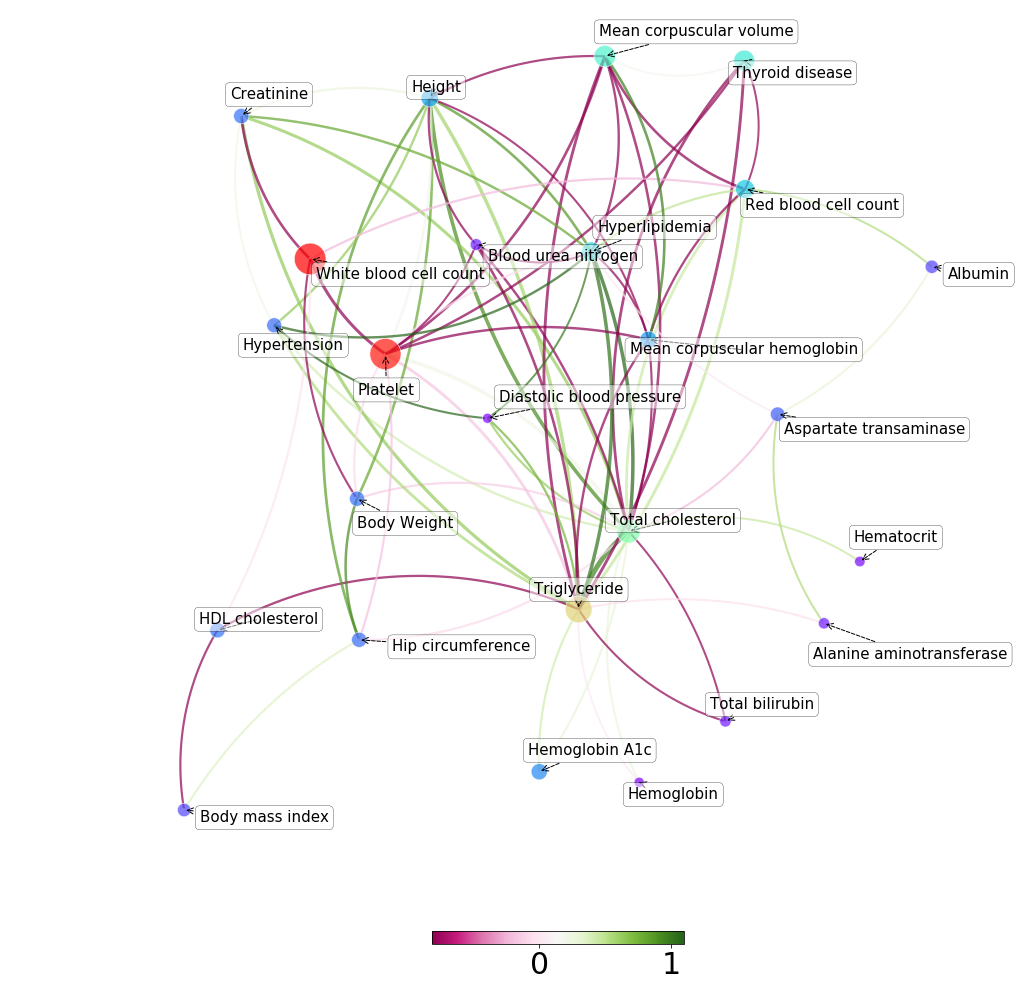

In [86]:
node_color='heritability'
node_size='heritability'

edge_width='Z_abs'
edge_color='rG'

from matplotlib.collections import LineCollection

plt.rcParams["figure.figsize"] = (15,20)
plt.rcParams["font.size"] = 30


#node initialization
node_df=pd.DataFrame([(pos[node]) for node in G.nodes],index=G.nodes,columns=['x','y'])
for node in G.nodes:
    for idx,value in G.nodes[node].items():
        node_df.loc[node,idx]=value

#edge initialization
edge_df=pd.DataFrame([(pos[edge[0]],pos[edge[1]]) for edge in G.edges],index=G.edges,columns=['source_xy','target_xy'])
for edge in G.edges:
    for idx,value in G.edges[edge].items():
        edge_df.loc[edge,idx]=value

############## Drawing ##############
        
# Draw colorbar
"""
scatter_x=node_df['x']
scatter_y=node_df['y']
scatter_hue=node_df[node_color]
points=plt.scatter(x=scatter_x,y=scatter_y,c=scatter_hue,cmap=plt.cm.PiYG)
        
plt.clf()
"""   

#,[
scatter_x=[i[0] for i in edge_df['source_xy'].values]
scatter_y=[i[1] for i in edge_df['source_xy'].values]
scatter_hue=edge_df[edge_color]
points=plt.scatter(x=scatter_x,y=scatter_y,c=scatter_hue,cmap=plt.cm.PiYG)
        
plt.clf()
  

fig, ax = plt.subplots()

plt.colorbar(points,orientation="horizontal",pad=0.07,shrink=0.3)   

# Draw edges


#line_collection_xy=[[row['source_xy'],(row['source_xy']+row['target_xy'])/2+(0.1,0.1),row['target_xy']] for idx,row in edge_df.iterrows()]
line_collection_xy=[draw_arc(row['source_xy'],row['target_xy']) for idx,row in edge_df.iterrows()]

line_collection_linewidths=np.array([row[edge_width] for idx,row in edge_df.iterrows()])
line_collection_linewidths=(line_collection_linewidths-line_collection_linewidths.min())/(line_collection_linewidths.max()-line_collection_linewidths.min())
line_collection_linewidths=2+3*line_collection_linewidths

line_collection_colors=np.array([plt.cm.PiYG(row[edge_color],alpha=0.7) for idx,row in edge_df.iterrows()])

line_collection=LineCollection(line_collection_xy,zorder=-5,colors=line_collection_colors,linewidths=line_collection_linewidths)
l_c=ax.add_collection(line_collection)

# Draw nodes

scatter_x=node_df['x']
scatter_y=node_df['y']
scatter_hue=node_df[node_color]
#scatter_hue=np.array([plt.cm.rainbow(row[node_color],alpha=0.7) for idx,row in node_df.iterrows()])
#
scatter_size=np.exp(node_df[node_size])
sns.scatterplot(x=scatter_x,y=scatter_y,hue=scatter_hue,palette=plt.cm.rainbow,vmin=-1,alpha=0.7,size=scatter_size,sizes=(100,1000),legend=None)#,color='white')#,edgecolor='black')


############## Annotation ##############


r_sample=np.arange(0.05,0.15,0.01)
theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/5]

np.random.shuffle(theta_sample)
move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
#print(move_sample)
#print(move_sample)
text_plotted=pd.DataFrame([])
for idx,row in node_df.sort_values('y',ascending=False).iterrows():
    description_short=idx
    
    s=description_short
    xy=np.array([row['x'], row['y']])
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    
    for move in move_sample:
        xytext=xy+move
        if text_plotted.shape[0]==0 or (((node_df['x']-xytext[0])**2+(node_df['y']-xytext[1])**2)<1).sum()==0 or (((text_plotted['x']-xytext[0])**2+0.5*(text_plotted['y']-xytext[1])**2)<0.05).sum()==0:
            plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0",ls='dashed'),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.5), ec="black", lw=0.3),size=15)
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            break

sns.despine(top=True,right=True,left=True,bottom=True)
plt.axis('off')

#plt.show()
plt.savefig('figure_network.svg', bbox_inches='tight')



In [49]:
node_color='per_bp_var'
node_size='per_bp_var'
edge_width='value'
edge_color='value'

from matplotlib.collections import LineCollection

plt.rcParams["figure.figsize"] = (20,25)
plt.rcParams["font.size"] = 15


#node initialization
node_df=pd.DataFrame([(pos[node]) for node in G.nodes],index=G.nodes,columns=['x','y'])
for node in G.nodes:
    for idx,value in G.nodes[node].items():
        node_df.loc[node,idx]=value

#edge initialization
edge_df=pd.DataFrame([(pos[edge[0]],pos[edge[1]]) for edge in G.edges],index=G.edges,columns=['source_xy','target_xy'])
for edge in G.edges:
    for idx,value in G.edges[edge].items():
        edge_df.loc[edge,idx]=value

############## Drawing ##############
        
# Draw colorbar
        
scatter_x=node_df['x']
scatter_y=node_df['y']
scatter_hue=node_df[node_color]
points=plt.scatter(x=scatter_x,y=scatter_y,c=scatter_hue,cmap=plt.cm.rainbow)
        
plt.clf()

fig, ax = plt.subplots()

plt.colorbar(points,orientation="horizontal",pad=0.07,shrink=0.3)   

# Draw edges


#line_collection_xy=[[row['source_xy'],(row['source_xy']+row['target_xy'])/2+(0.1,0.1),row['target_xy']] for idx,row in edge_df.iterrows()]
line_collection_xy=[draw_arc(row['source_xy'],row['target_xy']) for idx,row in edge_df.iterrows()]

line_collection_linewidths=np.array([row[edge_width] for idx,row in edge_df.iterrows()])
line_collection_linewidths=(line_collection_linewidths-line_collection_linewidths.min())/(line_collection_linewidths.max()-line_collection_linewidths.min())
line_collection_linewidths=1+5*line_collection_linewidths

line_collection_colors=np.array([plt.cm.Blues(row[edge_color],alpha=0.7) for idx,row in edge_df.iterrows()])

line_collection=LineCollection(line_collection_xy,zorder=-5,colors=line_collection_colors,linewidths=line_collection_linewidths)
l_c=ax.add_collection(line_collection)

# Draw nodes

scatter_x=node_df['x']
scatter_y=node_df['y']
scatter_hue=node_df[node_color]
#scatter_hue=np.array([plt.cm.rainbow(row[node_color],alpha=0.7) for idx,row in node_df.iterrows()])
#
scatter_size=np.exp(node_df[node_size])
sns.scatterplot(x=scatter_x,y=scatter_y,hue=scatter_hue,palette=plt.cm.rainbow,alpha=0.7,size=scatter_size,sizes=(100,1000),legend=None)#,color='white')#,edgecolor='black')


############## Annotation ##############


r_sample=np.arange(0.05,0.15,0.01)
theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/5]

np.random.shuffle(theta_sample)
move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
#print(move_sample)
#print(move_sample)
text_plotted=pd.DataFrame([])
for idx,row in node_df.sort_values('y',ascending=False).iterrows():
    description_short=idx
    
    s=description_short
    xy=np.array([row['x'], row['y']])
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    
    move=move_sample[0]
    xytext=xy+move
    #plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0",ls='dashed'),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.5), ec="black", lw=0.3),size=15)
    

sns.despine(top=True,right=True,left=True,bottom=True)
plt.axis('off')
plt.savefig('network.svg')

plt.show()



KeyError: 'per_bp_var'

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


error
error
error


<Figure size 1440x1800 with 0 Axes>

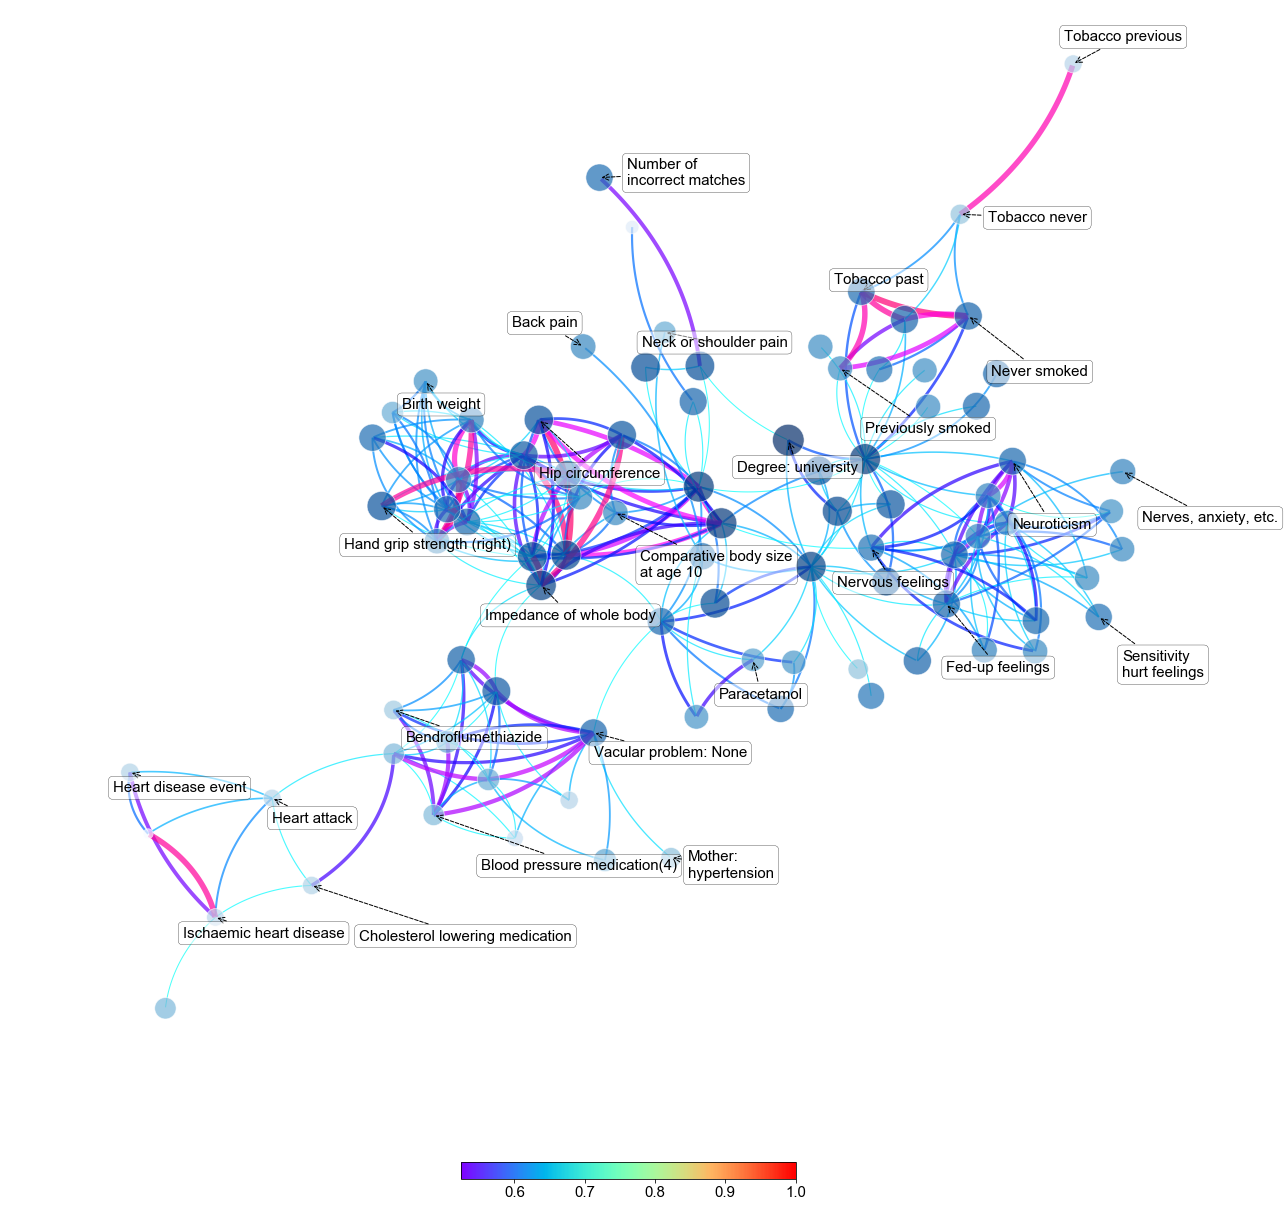

In [36]:
node_color='per_bp_var'
node_size='per_bp_var'
edge_width='value'
edge_color='value'

from matplotlib.collections import LineCollection

plt.rcParams["figure.figsize"] = (20,25)
plt.rcParams["font.size"] = 15


#node initialization
node_df=pd.DataFrame([(pos[node]) for node in G.nodes],index=G.nodes,columns=['x','y'])
for node in G.nodes:
    for idx,value in G.nodes[node].items():
        node_df.loc[node,idx]=value

#edge initialization
edge_df=pd.DataFrame([(pos[edge[0]],pos[edge[1]]) for edge in G.edges],index=G.edges,columns=['source_xy','target_xy'])
for edge in G.edges:
    for idx,value in G.edges[edge].items():
        edge_df.loc[edge,idx]=value

############## Drawing ##############
        
# Draw colorbar
        
scatter_x=node_df['x']
scatter_y=node_df['y']
scatter_hue=node_df[node_color]
points=plt.scatter(x=scatter_x,y=scatter_y,c=scatter_hue,cmap=plt.cm.rainbow)
        
plt.clf()

fig, ax = plt.subplots()

plt.colorbar(points,orientation="horizontal",pad=0.07,shrink=0.3)   

# Draw edges


#line_collection_xy=[[row['source_xy'],(row['source_xy']+row['target_xy'])/2+(0.1,0.1),row['target_xy']] for idx,row in edge_df.iterrows()]
line_collection_xy=[draw_arc(row['source_xy'],row['target_xy']) for idx,row in edge_df.iterrows()]

line_collection_linewidths=np.array([row[edge_width] for idx,row in edge_df.iterrows()])
line_collection_linewidths=(line_collection_linewidths-line_collection_linewidths.min())/(line_collection_linewidths.max()-line_collection_linewidths.min())
line_collection_linewidths=1+5*line_collection_linewidths

line_collection_colors=np.array([plt.cm.hsv(row[edge_color],alpha=0.7) for idx,row in edge_df.iterrows()])

line_collection=LineCollection(line_collection_xy,zorder=-5,colors=line_collection_colors,linewidths=line_collection_linewidths)
l_c=ax.add_collection(line_collection)

# Draw nodes

scatter_x=node_df['x']
scatter_y=node_df['y']
scatter_hue=node_df[node_color]
#scatter_hue=np.array([plt.cm.rainbow(row[node_color],alpha=0.7) for idx,row in node_df.iterrows()])
#
scatter_size=np.exp(node_df[node_size])
sns.scatterplot(x=scatter_x,y=scatter_y,hue=scatter_hue,palette=plt.cm.Blues,alpha=0.7,size=scatter_size,sizes=(100,1000),legend=None)#,color='white')#,edgecolor='black')


############## Annotation ##############


r_sample=np.arange(0.05,0.15,0.01)
theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/5]

np.random.shuffle(theta_sample)
move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
#print(move_sample)
#print(move_sample)
text_plotted=pd.DataFrame([])
for idx,row in node_df.sort_values('y',ascending=False).iterrows():
    description_short=idx
    
    s=description_short
    xy=np.array([row['x'], row['y']])
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    
    for move in move_sample:
        xytext=xy+move
        if text_plotted.shape[0]==0 or (((node_df['x']-xytext[0])**2+(node_df['y']-xytext[1])**2)<1).sum()==0 or (((text_plotted['x']-xytext[0])**2+0.5*(text_plotted['y']-xytext[1])**2)<0.05).sum()==0:
            plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0",ls='dashed'),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.5), ec="black", lw=0.3),size=15)
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            break

sns.despine(top=True,right=True,left=True,bottom=True)
plt.axis('off')

plt.show()



In [37]:
line_collection_linewidths=np.array([row[edge_width] for idx,row in edge_df.iterrows()])
line_collection_linewidths=(line_collection_linewidths-line_collection_linewidths.min())/(line_collection_linewidths.max()-line_collection_linewidths.min())
line_collection_linewidths=1+5*line_collection_linewidths
